# Proyek Analisis Data: Bike-Sharing Dataset
- **Nama:** Shionita Dwilani Nainggolan
- **Email:** m002b4kx4144@bangkit.academy
- **ID Dicoding:** shionitad031103

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Kapan waktu peminjaman sepeda tinggi?
- Pertanyaan 2: Bagaimana pengaruh cuaca, suhu, kelembapan, dan kecepatan angin terhadap permintaan peminjaman sepeda?

## Import Semua Packages/Library yang Digunakan

## Import Semua Packages/Library yang Digunakan
Pada bagian ini, kita akan mengimpor beberapa library yang diperlukan untuk analisis data. Library yang digunakan antara lain:
- `numpy`: Digunakan untuk operasi komputasi numerik.
- `pandas`: Digunakan untuk manipulasi dan analisis data dalam bentuk tabel (DataFrame).
- `matplotlib` dan `seaborn`: Digunakan untuk membuat visualisasi data yang informatif.


In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

## Memuat Dataset
Pada tahap ini, kita memuat dataset `day.csv` menggunakan Pandas. Data ini akan digunakan untuk menganalisis faktor-faktor yang mempengaruhi peminjaman sepeda.


In [73]:
day = pd.read_csv("data/day.csv", delimiter=",")
day

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [74]:
hour = pd.read_csv("data/hour.csv", delimiter=",")
hour

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**

- Terdapat dua dataset:
  - **`day.csv`**: Data peminjaman sepeda per hari (731 data).
  - **`hour.csv`**: Data peminjaman sepeda per jam (17,379 data).
- Atribut yang tersedia antara lain: `instant`, `dteday`, `season`, `yr`, `mnth`, `hr`, `holiday`, `weekday`, `workingday`, `weathersit`, `temp`, `atemp`, `hum`, `windspeed`, `casual`, `registered`, dan `cnt`.

### Assessing Data

#### Mengecek Missing Values

Memastikan tidak ada data yang hilang dalam dataset.

In [75]:
day.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [76]:
hour.isnull().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


#### Mengecek Data Duplikat

Memastikan tidak ada data duplikat yang dapat mempengaruhi analisis.

In [77]:
day.duplicated().sum()

0

In [78]:
hour.duplicated().sum()

0

#### Mengecek Outlier pada Dataset 'day'

Mengidentifikasi outlier pada kolom `cnt` untuk dataset per hari.

In [79]:
Q1_day = day['cnt'].quantile(0.25)
Q3_day = day['cnt'].quantile(0.75)
IQR_day = Q3_day - Q1_day
lower_bound_day = Q1_day - 1.5 * IQR_day
upper_bound_day = Q3_day + 1.5 * IQR_day
outliers_day = day[(day['cnt'] < lower_bound_day) | (day['cnt'] > upper_bound_day)]
print(f"Jumlah outlier pada dataset 'day': {outliers_day.shape[0]}")


Jumlah outlier pada dataset 'day': 0


#### Mengecek Outlier pada Dataset 'hour'

Mengidentifikasi outlier pada kolom `cnt` untuk dataset per jam.

In [80]:
Q1_hour = hour['cnt'].quantile(0.25)
Q3_hour = hour['cnt'].quantile(0.75)
IQR_hour = Q3_hour - Q1_hour
lower_bound_hour = Q1_hour - 1.5 * IQR_hour
upper_bound_hour = Q3_hour + 1.5 * IQR_hour
outliers_hour = hour[(hour['cnt'] < lower_bound_hour) | (hour['cnt'] > upper_bound_hour)]
print(f"Jumlah outlier pada dataset 'hour': {outliers_hour.shape[0]}")


Jumlah outlier pada dataset 'hour': 505


**Insight:**

- Tidak ada **missing values** atau **data duplikat** pada kedua dataset.
- Dataset **`hour`** memiliki **outlier** pada kolom `cnt`, sedangkan dataset **`day`** tidak.

### Cleaning Data

Menghapus outlier pada dataset `hour` untuk meningkatkan kualitas analisis.

In [81]:
hour_clean = hour[(hour['cnt'] >= lower_bound_hour) & (hour['cnt'] <= upper_bound_hour)]
print(f"Jumlah data sebelum pembersihan outlier: {hour.shape[0]}")
print(f"Jumlah data setelah pembersihan outlier: {hour_clean.shape[0]}")


Jumlah data sebelum pembersihan outlier: 17379
Jumlah data setelah pembersihan outlier: 16874


**Insight:**

- Dataset **`hour_clean`** adalah hasil pembersihan dari dataset `hour` dengan menghapus outlier.
- Menghapus outlier dari dataset yang besar tidak akan mengganggu analisis secara signifikan.

## Exploratory Data Analysis (EDA)

### Statistik Deskriptif

Melihat statistik dasar dari kedua dataset.

In [82]:
day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [83]:
hour_clean.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16874.000000,16874,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8542.168899,NaN,2.490399,0.487733,6.513275,11.458101,0.029513,2.997748,0.678618,1.430663,0.492650,0.471970,0.630412,0.189619,33.418632,139.291514,172.710146
std,5007.766040,NaN,1.111966,0.499864,3.462438,6.962144,0.169244,2.013054,0.467021,0.642689,0.192455,0.171878,0.192600,0.122460,45.896591,126.052802,155.020918
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4219.250000,NaN,1.000000,0.000000,4.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,32.000000,38.000000
50%,8438.500000,NaN,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.179100,15.000000,111.000000,135.000000
75%,12832.750000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,45.000000,208.000000,265.750000


### Visualisasi Distribusi Data

Membuat histogram untuk memahami distribusi data pada setiap fitur.

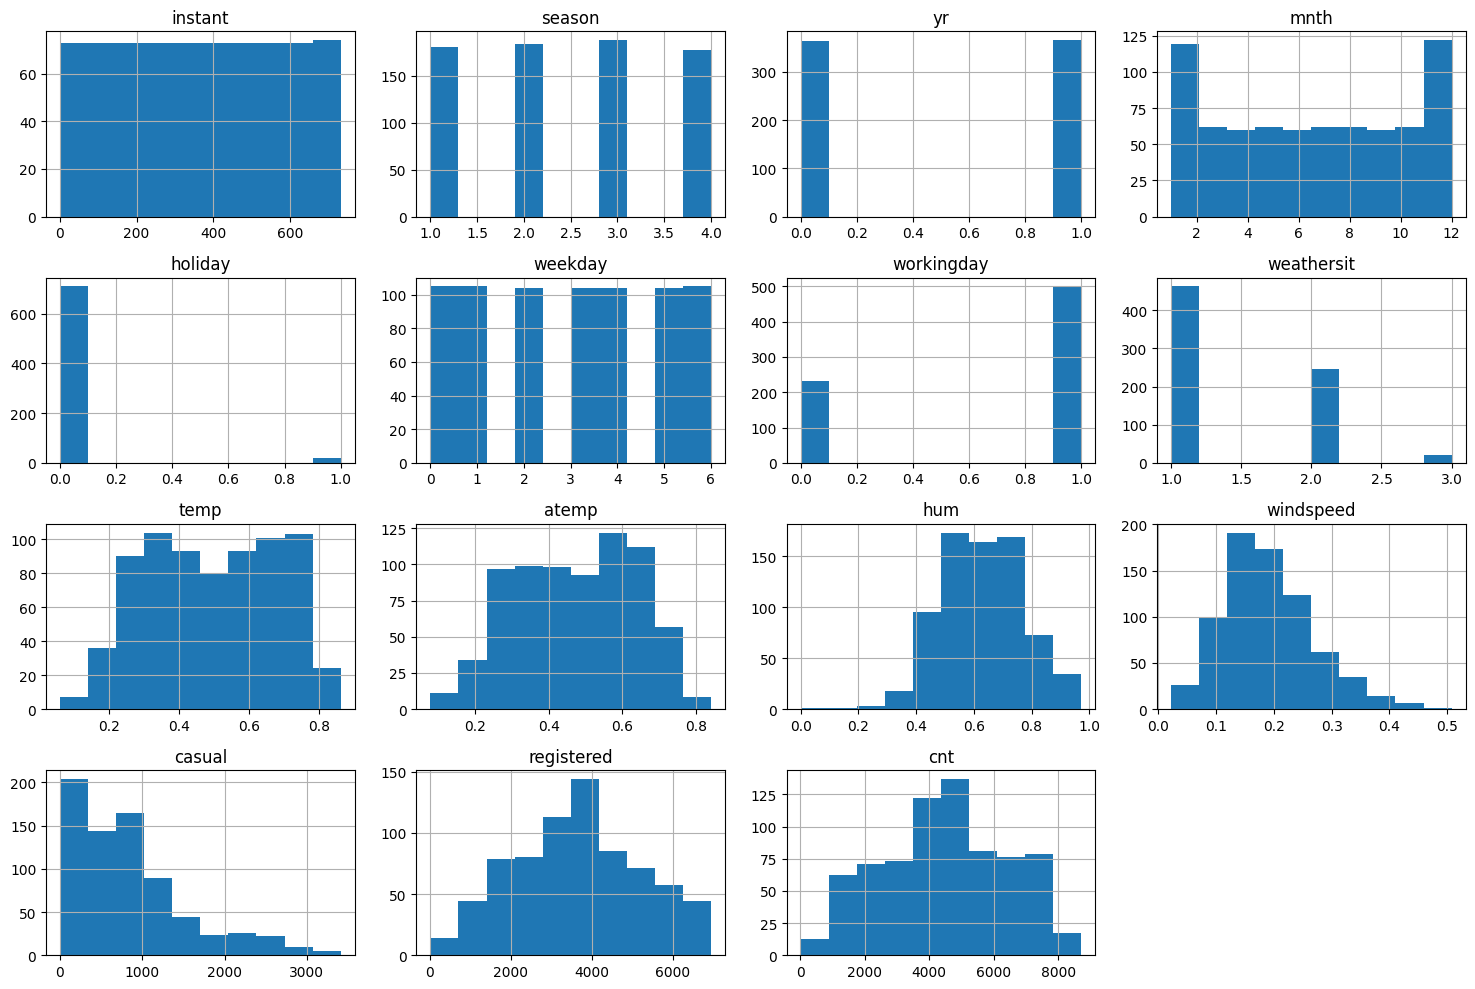

In [84]:
day.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


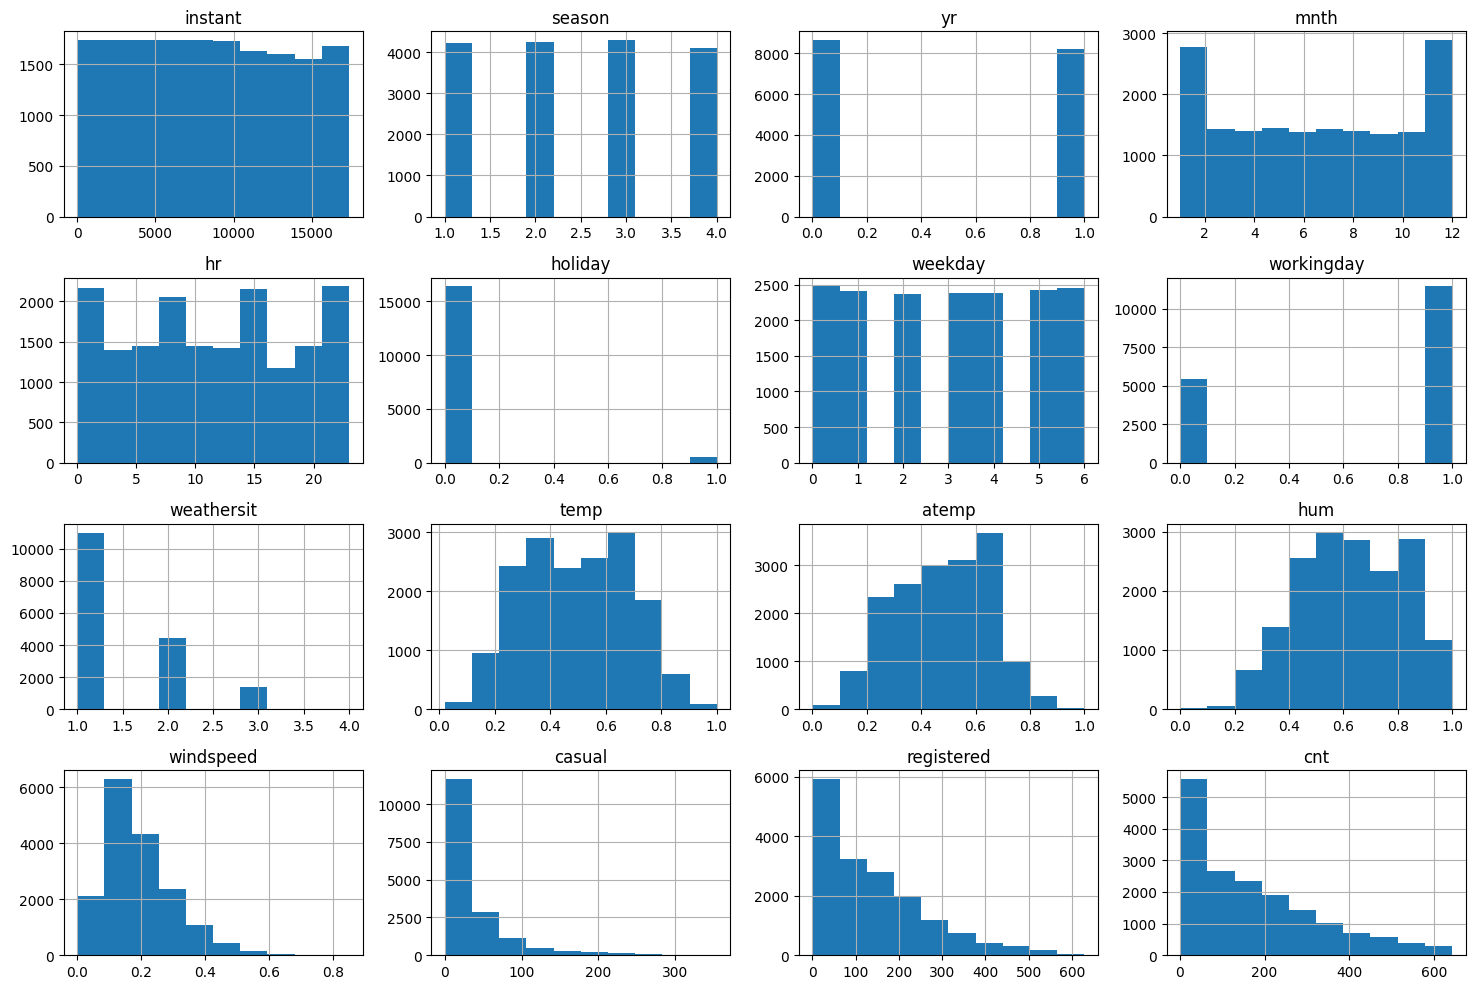

In [85]:
hour_clean.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


### Analisis Korelasi

#### Dataset 'day'

Menghitung dan memvisualisasikan korelasi antar variabel pada dataset `day`.

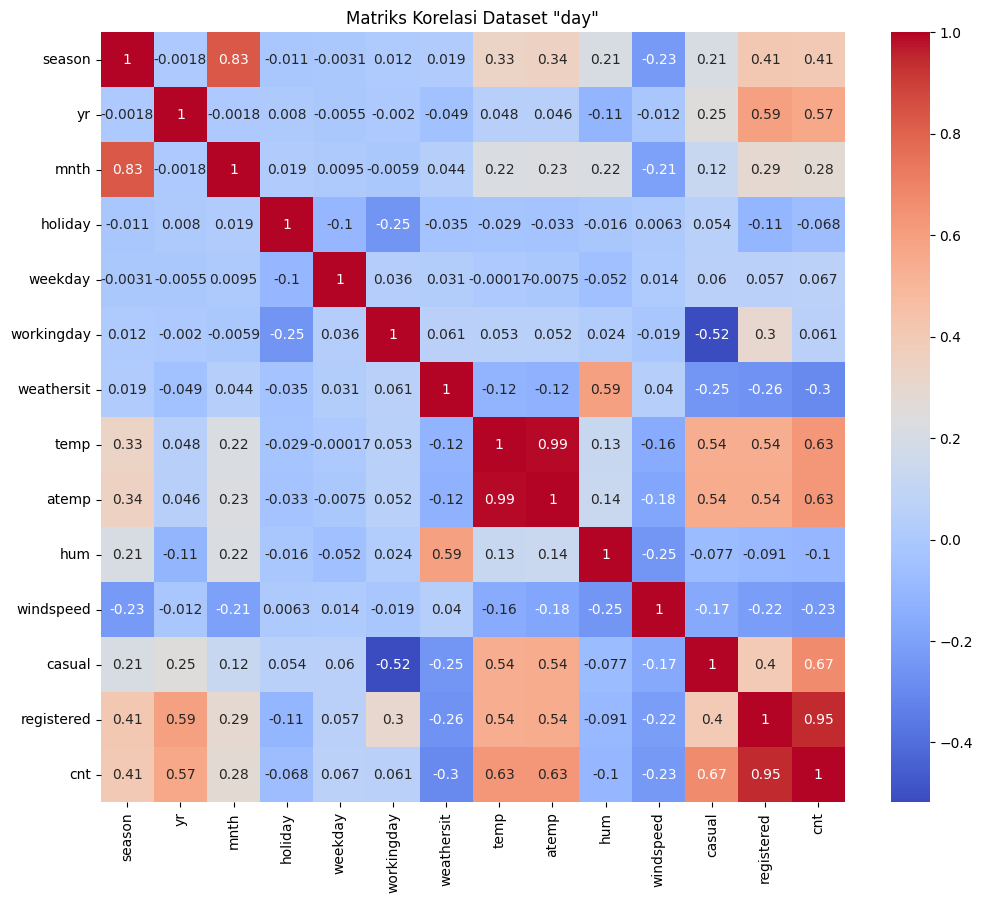

In [86]:
day_numeric = day.select_dtypes(include='number').drop(columns=['instant'])
corr_day = day_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_day, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Dataset "day"')
plt.show()


#### Dataset 'hour_clean'

Menghitung dan memvisualisasikan korelasi antar variabel pada dataset `hour_clean`.

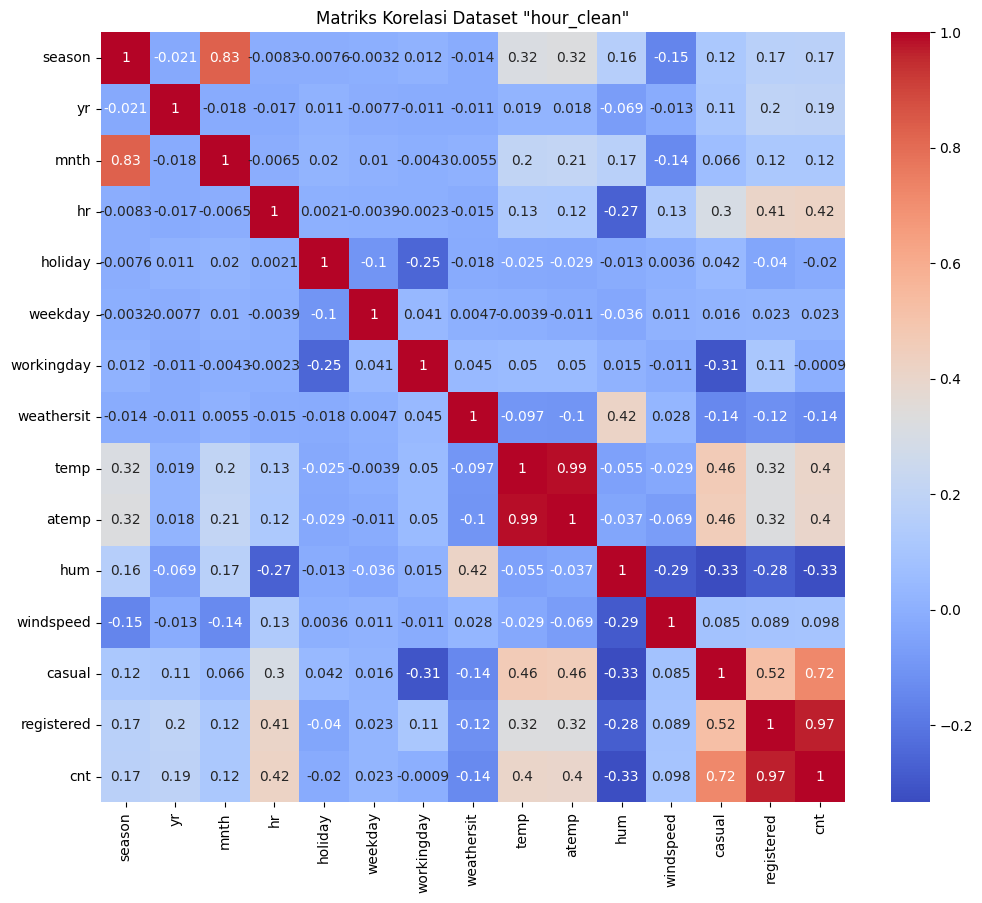

In [87]:
hour_numeric = hour_clean.select_dtypes(include='number').drop(columns=['instant'])
corr_hour = hour_numeric.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_hour, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi Dataset "hour_clean"')
plt.show()


**Insight:**

- **`temp`** dan **`atemp`** memiliki korelasi positif kuat dengan **`cnt`** (jumlah peminjaman).
- **`hum`** dan **`windspeed`** memiliki korelasi lemah dengan **`cnt`**.
- Peminjaman sepeda lebih banyak terjadi pada **hari kerja**.

## Visualization & Explanatory Analysis

### Menjawab Pertanyaan 1: Kapan waktu peminjaman sepeda tertinggi?

#### Rata-rata Peminjaman per Jam

Menganalisis waktu peminjaman tertinggi berdasarkan jam dalam sehari.

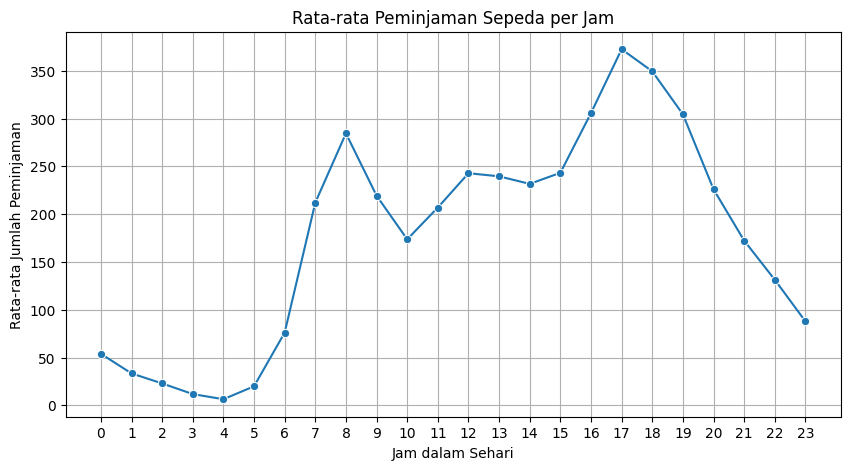

In [88]:
hourly_rentals = hour_clean.groupby('hr')['cnt'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.lineplot(x='hr', y='cnt', data=hourly_rentals, marker='o')
plt.title('Rata-rata Peminjaman Sepeda per Jam')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


#### Rata-rata Peminjaman per Musim

Menganalisis musim dengan peminjaman tertinggi.

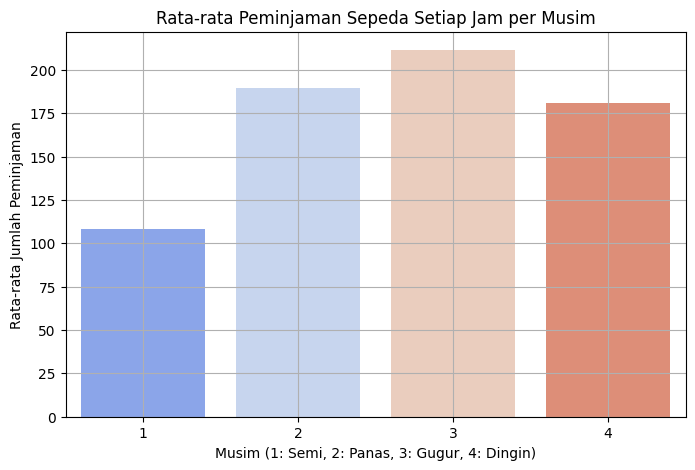

In [89]:
season_rentals = hour_clean.groupby('season')['cnt'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', data=season_rentals, palette='coolwarm')
plt.title('Rata-rata Peminjaman Sepeda Setiap Jam per Musim')
plt.xlabel('Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.grid(True)
plt.show()


#### Rata-rata Peminjaman per Hari dalam Minggu

Menganalisis hari dalam minggu dengan peminjaman tertinggi.

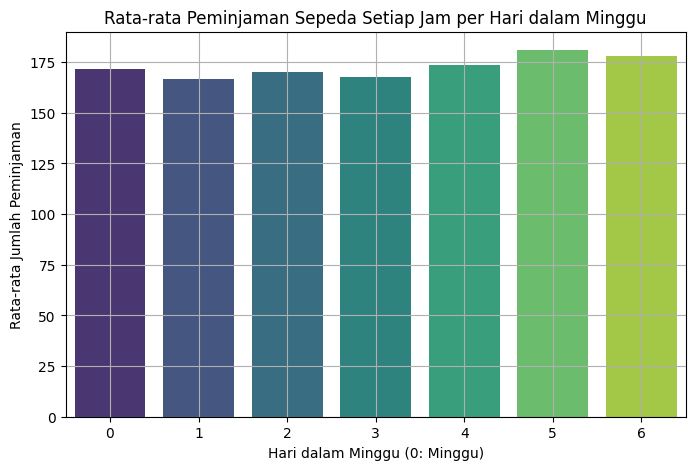

In [90]:
weekday_rentals = hour_clean.groupby('weekday')['cnt'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='weekday', y='cnt', data=weekday_rentals, palette='viridis')
plt.title('Rata-rata Peminjaman Sepeda Setiap Jam per Hari dalam Minggu')
plt.xlabel('Hari dalam Minggu (0: Minggu)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.grid(True)
plt.show()


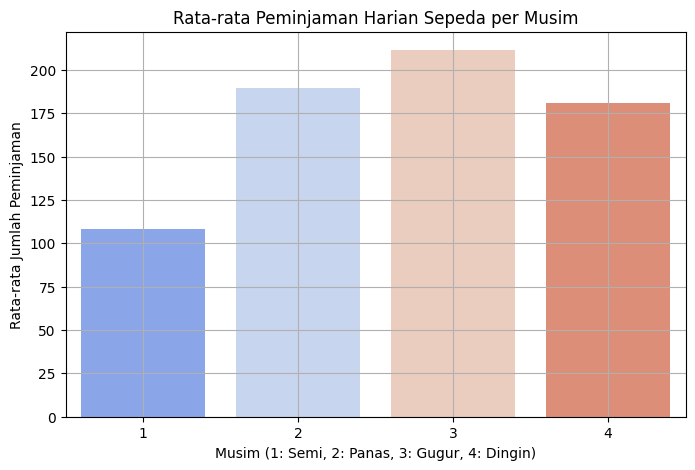

In [91]:
season_rentals_day = day.groupby('season')['cnt'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='season', y='cnt', data=season_rentals, palette='coolwarm')
plt.title('Rata-rata Peminjaman Harian Sepeda per Musim')
plt.xlabel('Musim (1: Semi, 2: Panas, 3: Gugur, 4: Dingin)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.grid(True)
plt.show()


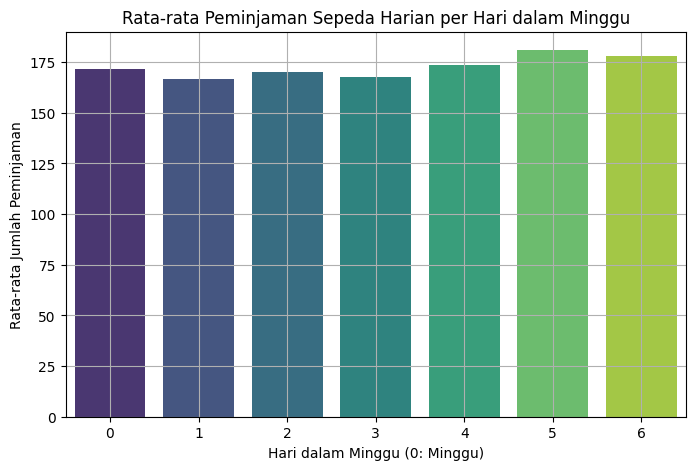

In [92]:
weekday_rentals_day = hour_clean.groupby('weekday')['cnt'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(x='weekday', y='cnt', data=weekday_rentals, palette='viridis')
plt.title('Rata-rata Peminjaman Sepeda Harian per Hari dalam Minggu')
plt.xlabel('Hari dalam Minggu (0: Minggu)')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.grid(True)
plt.show()


**Insight:**

- **Puncak peminjaman** terjadi pada jam **08:00** dan **17:00**, sesuai dengan jam berangkat dan pulang kerja.
- Musim **panas** memiliki rata-rata peminjaman tertinggi.
- **Hari kerja** memiliki jumlah peminjaman lebih tinggi dibanding akhir pekan.

### Menjawab Pertanyaan 2: Bagaimana pengaruh cuaca, suhu, kelembapan, dan kecepatan angin terhadap permintaan peminjaman sepeda?

#### Analisis Korelasi Variabel Cuaca

Menghitung korelasi antara variabel cuaca dengan jumlah peminjaman.

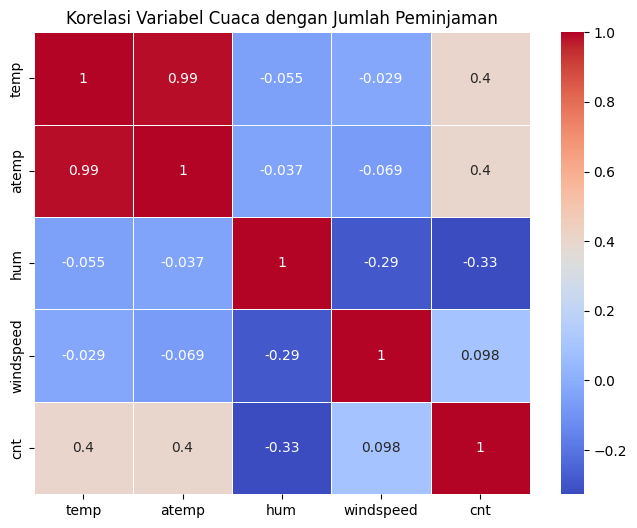

In [107]:
weather_corr = hour_clean[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(weather_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Variabel Cuaca dengan Jumlah Peminjaman')
plt.show()


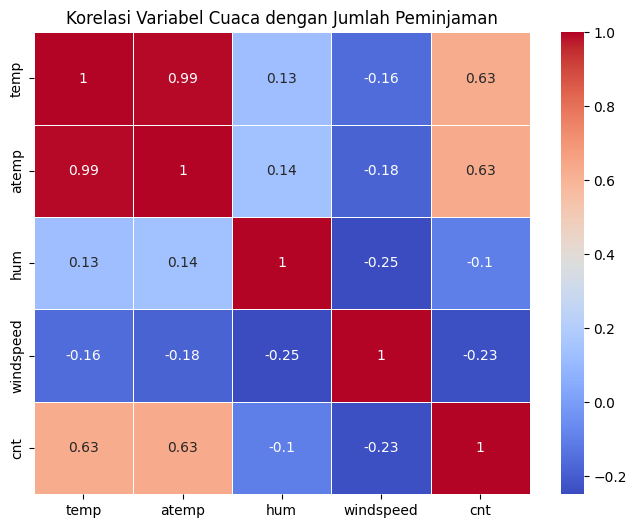

In [108]:
weather_corr = day[['temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(weather_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Korelasi Variabel Cuaca dengan Jumlah Peminjaman')
plt.show()


#### Scatter Plot Suhu vs Jumlah Peminjaman

Memvisualisasikan hubungan antara suhu dan jumlah peminjaman.

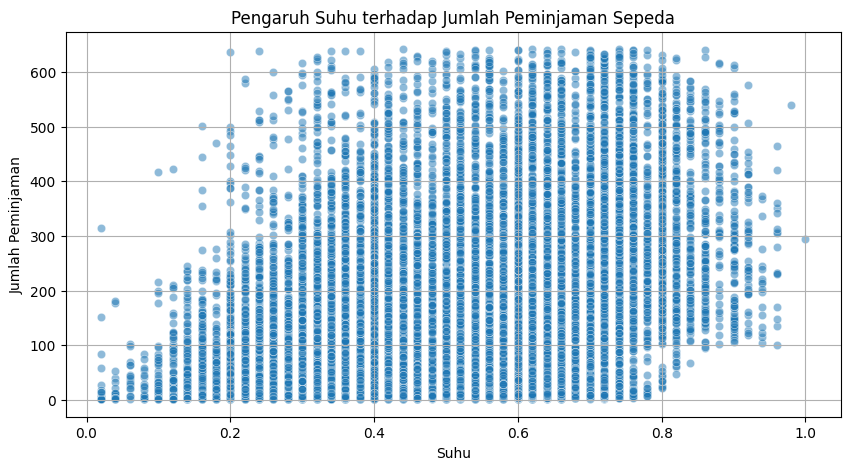

In [109]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='temp', y='cnt', data=hour_clean, alpha=0.5)
plt.title('Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Jumlah Peminjaman')
plt.grid(True)
plt.show()


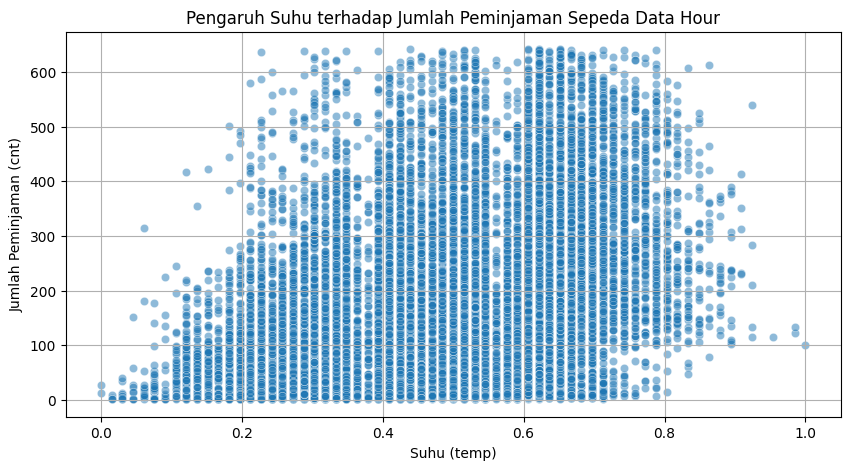

In [96]:
#Scatterplot Atemp dengan Cnt Data Hour
plt.figure(figsize=(10, 5))
sns.scatterplot(x='atemp', y='cnt', data=hour_clean, alpha=0.5)
plt.title('Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda Data Hour')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.grid(True)
plt.show()

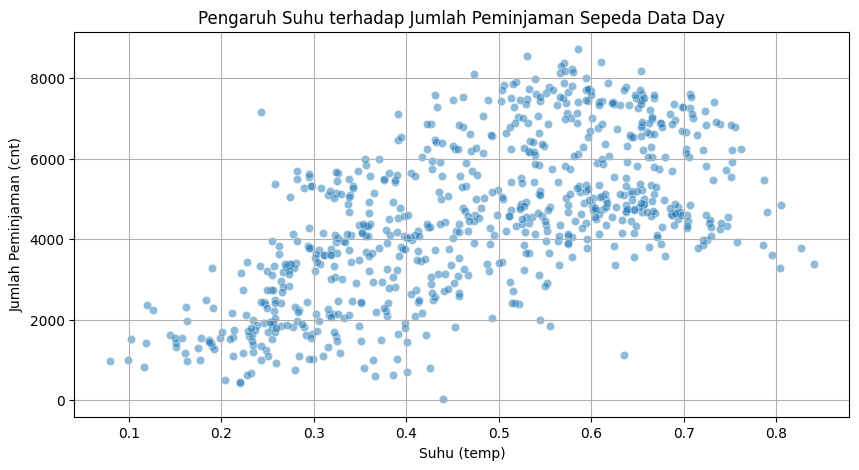

In [97]:
#Scatterplot Atemp dengan Cnt Data Day
plt.figure(figsize=(10, 5))
sns.scatterplot(x='atemp', y='cnt', data=day, alpha=0.5)
plt.title('Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda Data Day')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.grid(True)
plt.show()

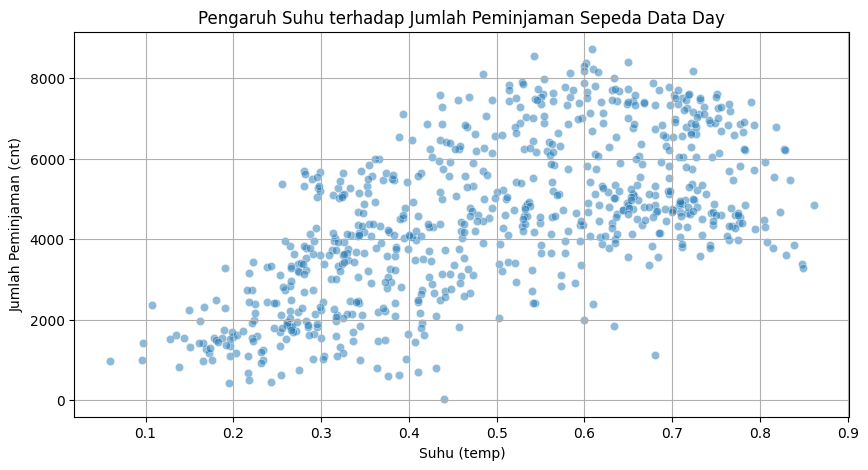

In [98]:
#Scatterplot Temp dengan Cnt Data Day
plt.figure(figsize=(10, 5))
sns.scatterplot(x='temp', y='cnt', data=day, alpha=0.5)
plt.title('Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda Data Day')
plt.xlabel('Suhu (temp)')
plt.ylabel('Jumlah Peminjaman (cnt)')
plt.grid(True)
plt.show()

**Insight:**

- **Suhu** memiliki korelasi positif yang signifikan dengan jumlah peminjaman.
- **Kelembapan** dan **kecepatan angin** tidak menunjukkan korelasi yang kuat.

## Analisis Lanjutan (Opsional)

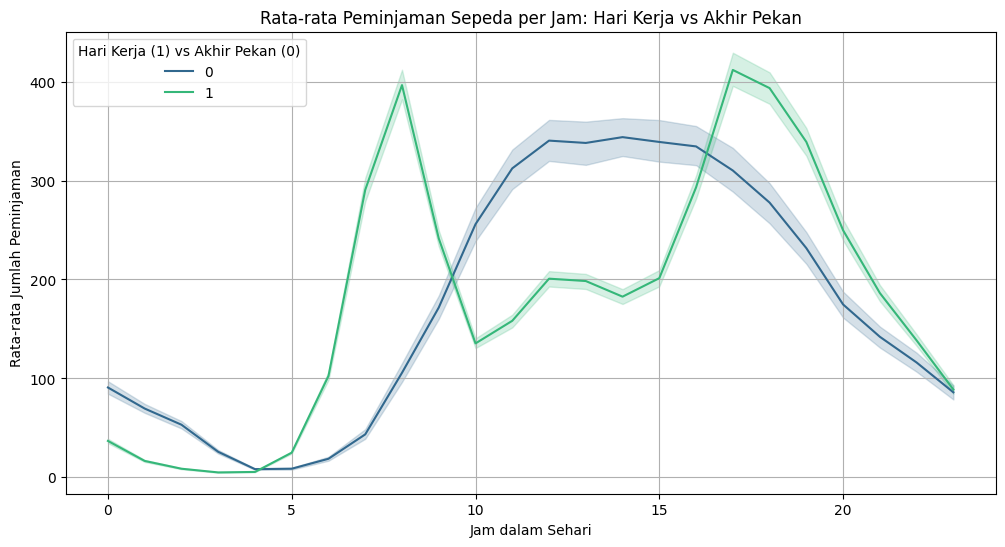

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rata-rata jumlah peminjaman per jam untuk hari kerja vs akhir pekan
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_clean, x='hr', y='cnt', hue='workingday', palette='viridis')
plt.title('Rata-rata Peminjaman Sepeda per Jam: Hari Kerja vs Akhir Pekan')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Rata-rata Jumlah Peminjaman')
plt.legend(title='Hari Kerja (1) vs Akhir Pekan (0)')
plt.grid(True)
plt.show()


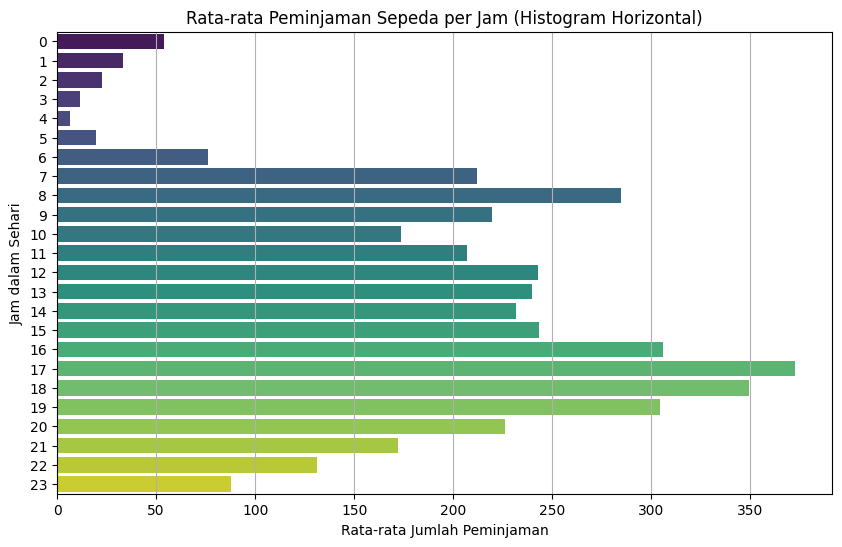

In [100]:
#Mengelompokkan data berdasarkan jam untuk menghitung rata-rata peminjaman
hour_avg = hour_clean.groupby('hr')['cnt'].mean().reset_index()

#Plot histogram horizontal
plt.figure(figsize=(10, 6))
sns.barplot(y='hr', x='cnt', data=hour_avg, orient='h', palette='viridis')
plt.title('Rata-rata Peminjaman Sepeda per Jam (Histogram Horizontal)')
plt.xlabel('Rata-rata Jumlah Peminjaman')
plt.ylabel('Jam dalam Sehari')
plt.grid(axis='x')
plt.show()

## Conclusion

- **Kesimpulan Pertanyaan 1:** Waktu peminjaman sepeda tertinggi terjadi pada jam sibuk (08:00 dan 17:00) selama hari kerja, terutama pada musim panas.
- **Kesimpulan Pertanyaan 2:** Suhu memiliki pengaruh positif signifikan terhadap permintaan peminjaman sepeda. Semakin tinggi suhu, semakin banyak peminjaman. Kelembapan dan kecepatan angin tidak memiliki pengaruh yang berarti.

## Menyimpan Dataset yang Telah Dibersihkan

Menyimpan dataset yang telah dibersihkan untuk penggunaan lebih lanjut.

In [101]:
# import pandas as pd

# # Asumsikan 'hour_clean' adalah dataframe hasil pembersihan yang telah Anda buat
# # Menyimpan dataframe ke file CSV
# hour_clean.to_csv('hour_clean.csv', index=False)

# # Mengunduh file CSV langsung di Google Colab
# from google.colab import files
# files.download('hour_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [102]:
hour_clean.to_csv('dashboard/hour_clean.csv', index=False)
day.to_csv('dashboard/day.csv', index=False)